In [1]:
import numpy as np
import argparse
import os, time

from pykin.utils import plot_utils as p_utils

from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement
from pytamp.utils import point_cloud_utils as pc_utils

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=10, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=17, help="A random seed")
#     parser.add_argument("--seed", metavar="i", type=int, default=144, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('panda', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


2023-07-23 17:59:01.586609: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-64e7a326-50cd-4aec-9fa5-753120af0a68.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.39587317 0.02541839 0.83529998]),
                           Object(name=can0, pos=[0.66714729 0.06273526 0.85059666]),
                           Object(name=cereal0, pos=[ 0.31638119 -0.11948705  0.88526188])]}),
             ('panda_gripper', {'holding': None})])
***************************************************************

*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Obj

In [2]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
        use_pick_action=False,
        consider_next_scene=True
    )
mcts.only_optimize_1 = False

2023-07-23 17:59:03.278827: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-07-23 17:59:03.326137: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-23 17:59:03.326256: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-07-23 17:59:03.326296: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-07-23 17:59:03.328425: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-07-23 17:59:03.328495: I tensorflow/stream_executor/plat

/home/juju/contact_graspnet/pointnet2/tf_ops/sampling
<module 'contact_graspnet.contact_graspnet' from '/home/juju/contact_graspnet/contact_graspnet/contact_graspnet.py'>
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


/home/juju/contact_graspnet/contact_graspnet/config_utils.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  global_config = yaml.load(f)
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
/home/juju/anaconda3/envs/contact_graspnet/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1692: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` i

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2023-07-23 17:59:05.412336: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-23 17:59:05.413261: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-23 17:59:05.413361: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3080 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 68 deviceMemorySize: 9.77GiB deviceMemoryBandwidth: 707.88GiB/s
2023-07-23 17:59:05.413404: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), 

INFO:tensorflow:Restoring parameters from /home/juju/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-144144


2023-07-23 17:59:05.668603: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-07-23 17:59:05.668625: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-07-23 17:59:05.668628: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-07-23 17:59:05.668762: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-23 17:59:05.668853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-23 17:59:05.668903: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

In [3]:
start_time = time.time()
for i in range(budgets):
# for i in range(10):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 1 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(7) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(7) -> A(10) -> S'(12) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(12) -> A(16) -> S'(17) Reward : 2.5
[Action] Rearr cereal0
placed another place not goal
[Reward] S(17) -> A(20) -> S'(22) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(22) -> A(23) -> S'(26) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(26) -> A(28) -> S'(30) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(30) -> A(31) -> S'(33) Reward : -1
[Action] Rearr can0
Bad Action
[Reward] S(33) -> A(34) -> S'(37) Reward : -2.5
[Action] Rearr ben_cube0
Good Action
[Reward] S(37) -> A(39) -> S'(42) Reward : 1.0
[Action] Rearr cereal0
placed another place not goal
[Rewar

2023-07-23 17:59:07.046335: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-07-23 17:59:07.393152: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-07-23 17:59:07.912533: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-07-23 17:59:08.190049: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


Generated 6 grasps for object ben_cube0
cereal0
Extracted Region Cube Size:  0.4
Generated 147 grasps for object cereal0
can0
Extracted Region Cube Size:  0.4


[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000004


Generated 117 grasps for object can0
pick ben_cube0
solve with LM1
Iterators : 10
WorkingTime[inverse_kinematics]: 0.0053 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.257
WorkingTime[run]: 3.3718 sec

WorkingTime[run]: 0.0504 sec

WorkingTime[run]: 0.0496 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000002


Cost is 1.086
WorkingTime[run]: 4.7969 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0044 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.733
WorkingTime[run]: 4.2798 sec

WorkingTime[run]: 0.0508 sec

WorkingTime[run]: 0.0623 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 1.793
WorkingTime[run]: 3.2663 sec

Success pnp
pick cereal0
solve with LM1
Iterators : 9
WorkingTime[inverse_kinematics]: 0.0048 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000002
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 0.83
WorkingTime[run]: 3.2736 sec

WorkingTime[run]: 0.0520 sec

WorkingTime[run]: 0.0522 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 0.833
WorkingTime[run]: 4.5879 sec

solve with LM1
Iterators : 8
WorkingTime[inverse_kinematics]: 0.0044 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 5 --> 40
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.542
WorkingTime[run]: 4.1815 sec

WorkingTime[run]: 0.0493 sec

WorkingTime[run]: 0.0483 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 1.461
WorkingTime[run]: 3.4228 sec

Success pnp
pick can0
solve with LM1
Iterators : 6
WorkingTime[inverse_kinematics]: 0.0032 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000000
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.025
WorkingTime[run]: 3.5064 sec

WorkingTime[run]: 0.0493 sec

WorkingTime[run]: 0.0533 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning
[INFO] [RRT Star Planner]: The joint limit has been successfully checked. Pose error is 0.000003


Cost is 1.056
WorkingTime[run]: 4.9286 sec

solve with LM1
Iterators : 7
WorkingTime[inverse_kinematics]: 0.0120 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 3 --> 20
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [Cartesian Planner]: Start to compute Cartesian Planning
[INFO] [Cartesian Planner]: Generate Path Successfully!! Error is 0.000001
[INFO] [RRT Star Planner]: Start to compute RRT-star Planning


Cost is 1.43
WorkingTime[run]: 4.5495 sec

WorkingTime[run]: 0.0521 sec

WorkingTime[run]: 0.0525 sec



[INFO] [RRT Star Planner]: Generate Path Successfully!!
[INFO] [RRT Star Planner]: Path length 2 --> 10


Cost is 1.16
WorkingTime[run]: 3.4510 sec

Success pnp
Update Sub optimal Nodes!! Value is 15.784533.
Add level_1_node!
########### Running time :  51.69253063201904 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 3 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(58) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(58) -> A(62) -> S'(63) Reward : 3.333
[Action] Rearr ben_cube0
Good Action
[Reward] S(63) -> A(65) -> S'(68) Reward : 2.5
[Action] Rearr can0
Good Action
[Reward] S(68) -> A(70) -> S'(72) Reward : 2.0
##########['cereal0', 'ben_cube0', 'can0']#############
Success!!!!!
Terminal State! Reward is 5
can0
Extracted Region Cube Size:  0.4
Generated 158 grasps for object can0
cereal0
Extracted Region Cube Size:  0.4
Generated 140 grasps for object cereal0
ben_cube0
Extracted Region Cube Size:  0.4
Generated 3 grasps for object ben_cube0
can0
Extracted Region Cube Size:  0.4
G

Extracted Region Cube Size:  0.4
Generated 6 grasps for object ben_cube0
can0
Extracted Region Cube Size:  0.4
Generated 184 grasps for object can0
cereal0
Extracted Region Cube Size:  0.4
Generated 143 grasps for object cereal0
can0
Extracted Region Cube Size:  0.4
Generated 31 grasps for object can0
A value of this optimal nodes is lower than maximum value.
Add level_1_node!
########### Running time :  56.566234827041626 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 17
=========== Search iteration : 9 ===========
[Action] Rearr can0
placed another place not goal
[Reward] S(0) -> A(3) -> S'(58) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(58) -> A(60) -> S'(239) Reward : 3.333
[Action] Rearr cereal0
placed another place not goal
[Reward] S(239) -> A(242) -> S'(244) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(244) -> A(247) -> S'(248) Reward : 2.0
[Action] Rearr ben_cube0
Bad Action
[Reward] S(248) -> A(249) -> S'(252) Reward : -4.0
[Ac

In [4]:
max_level_1_value = mcts.get_max_value_level_1()
print(max_level_1_value, mcts.history_level_1_dict)

########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    # mcts.render_rearr("_", max_value_nodes)

15.533333333333333 {0: {'nodes': [0, 2, 48, 52, 53, 56, 57], 'value': 15.533333333333333}, 1: {'nodes': [0, 3, 58, 62, 63, 65, 68, 70, 72], 'value': 11.433333333333334}, 2: {'nodes': [0, 2, 48, 49, 231, 234, 235, 237, 238], 'value': 13.100000000000001}, 3: {'nodes': [0, 2, 48, 50, 276, 278, 280, 281, 283, 286, 287, 289, 291], 'value': 9.82857142857143}}
Result 0 :  [0, 2, 48, 52, 53, 56, 57]
state num : 7


In [5]:
max_value_nodes, mcts.level_wise_2_success

([0, 2, 48, 52, 53, 56, 57], True)

In [6]:
mcts.tree.nodes[48]

{'number': 48,
 'visit': 3,
 'depth': 1,
 'state': <pytamp.scene.scene.Scene at 0x7fd13857b910>,
 'action': {'table': array([[ 0.44572288, -0.895171  ,  0.        ,  0.51564123],
         [ 0.895171  ,  0.44572288,  0.        , -0.04591909],
         [ 0.        ,  0.        ,  1.        ,  0.83529998],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'grasp': array([[-0.72194105,  0.61406543,  0.31894319,  0.37559196],
         [ 0.58594853,  0.78769904, -0.19024852,  0.03418994],
         [-0.36805625,  0.04953608, -0.92848307,  0.94420517],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'pre_grasp': array([[-0.72194105,  0.6140654 ,  0.31894317,  0.3596448 ],
         [ 0.5859485 ,  0.78769904, -0.19024852,  0.04370236],
         [-0.36805624,  0.04953608, -0.92848307,  0.9906293 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
        dtype=float32),
  'post_grasp': array([[-0.72194105,  0.6140654 ,  0.31894317,  0.37559196],


In [7]:
final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []
if mcts.level_wise_2_success:
    (
        pnp_all_joint_paths,
        pick_all_objects,
        place_all_object_poses,
    ) = mcts.get_all_joint_path(mcts.optimal_nodes)
    final_pnp_all_joint_paths.append(pnp_all_joint_paths)
    final_pick_all_objects.append(pick_all_objects)
    final_place_all_object_poses.append(place_all_object_poses)
    final_optimal_nodes.append(mcts.optimal_nodes)
else:
    final_pnp_all_joint_paths.append([])
    final_pick_all_objects.append([])
    final_place_all_object_poses.append([])
    final_optimal_nodes.append([])

In [8]:
pick_all_objects, place_all_object_poses

([['ben_cube0', 'cereal0', 'can0']],
 [[array([[ 0.44572288, -0.895171  ,  0.        ,  0.51564123],
          [ 0.895171  ,  0.44572288,  0.        , -0.04591909],
          [ 0.        ,  0.        ,  1.        ,  0.83529998],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   array([[-0.98329653, -0.18201081,  0.        ,  0.41679136],
          [ 0.18201081, -0.98329653,  0.        , -0.14025348],
          [ 0.        ,  0.        ,  1.        ,  0.88526188],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   array([[-0.88392556,  0.46762763,  0.        ,  0.60391191],
          [-0.46762763, -0.88392556,  0.        ,  0.0657071 ],
          [ 0.        ,  0.        ,  1.        ,  0.85059666],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])]])

In [9]:
final_pnp_all_joint_paths

[[[OrderedDict([('pre_grasp',
                 [array([ 0.00659057,  0.20406984, -0.00684996, -2.61943202, -0.01193677,
                          2.94823292, -0.79685158]),
                  array([ 0.01318114,  0.21179015, -0.01369991, -2.62087017, -0.02387354,
                          2.95487318, -0.808305  ]),
                  array([ 0.01977171,  0.21951045, -0.02054987, -2.62230831, -0.03581031,
                          2.96151344, -0.81975842]),
                  array([ 0.02636228,  0.22723075, -0.02739983, -2.62374646, -0.04774708,
                          2.9681537 , -0.83121184]),
                  array([ 0.03295285,  0.23495106, -0.03424979, -2.6251846 , -0.05968384,
                          2.97479396, -0.84266526]),
                  array([ 0.03954342,  0.24267136, -0.04109974, -2.62662275, -0.07162061,
                          2.98143423, -0.85411868]),
                  array([ 0.04613398,  0.25039166, -0.0479497 , -2.6280609 , -0.08355738,
                      

In [10]:
for i in mcts.history_level_1_dict[0]['nodes']:
    if not mcts.tree.nodes[i]['level1_5']:
        print("Error 1.5", i)
for i in mcts.history_level_1_dict[0]['nodes']:
    if not mcts.tree.nodes[i]['level2']:
        print("Error 2", i)
        

In [11]:
mcts.tree.nodes[0]['state'].objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.39587317 0.02541839 0.83529998]),
 'can0': Object(name=can0, pos=[0.66714729 0.06273526 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[ 0.31638119 -0.11948705  0.88526188])}

0 scene
100 scene
200 scene
300 scene
Animation Finished..
PWD :  ~/pytamp/
Save finished..


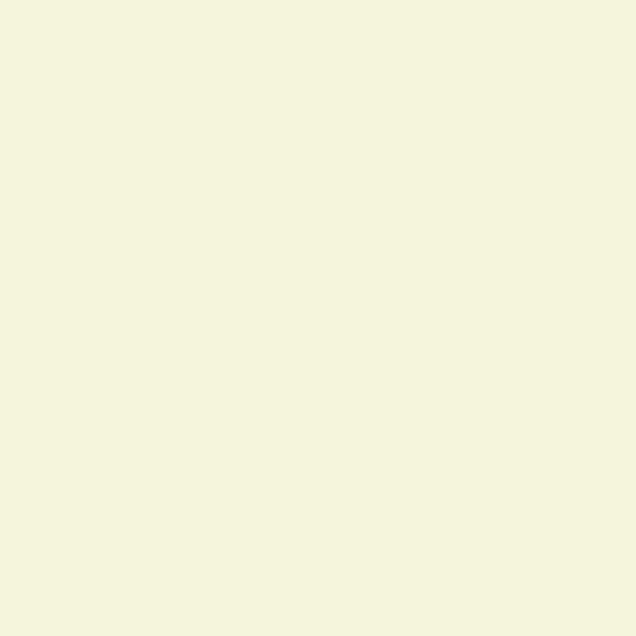

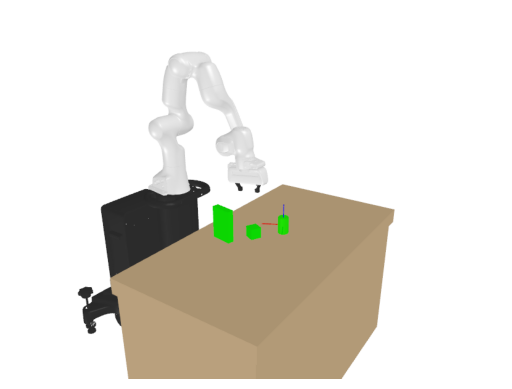

In [12]:
from pykin.utils.kin_utils import apply_robot_to_scene

mcts.rearr_action.scene_mngr.render.render_objects(mcts.tree.nodes[0]['state'].objs)
# pick.scene_mngr.render.trimesh_scene = apply_robot_to_scene(
#         trimesh_scene=pick.scene_mngr.render.trimesh_scene, 
#         robot=pick.scene_mngr.scene.robot,
#         geom="visual"
#             )
# pick.scene_mngr.render.set_camera_view()

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
    video_name="pick_rearrangement1_consider_next_scene",
)


In [18]:
mcts.rearr_action.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.39587317 0.02541839 0.83529998]),
 'can0': Object(name=can0, pos=[0.66714729 0.06273526 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[ 0.31638119 -0.11948705  0.88526188])}

In [10]:
from pytamp.search.node_data import NodeData

action = mcts.tree.nodes[195].get(NodeData.ACTION)
'grasp' in list(action.keys())

False

In [11]:
from pytamp.search.node_data import NodeData

visited_nodes = [
                True for n in max_value_nodes if mcts.tree.nodes[n][NodeData.LEVEL1_5] is True
            ]
# visited_nodes.append(False)
all(visited_nodes)

True

# Get first & last scene per node

In [12]:
i = 0
current_node = mcts.tree.nodes[max_value_nodes[2*i + 1]]
next_node = mcts.tree.nodes[max_value_nodes[2*i + 2]]

In [13]:
for i in next_node['joints'][0]:
    _ = next_node['joints'][0]
    print(i)
    first_joint = _[i][0]
    last_joint = _[i][-1]
    print(f"{i}'s first joints : ", first_joint)
    print(f"{i}'s last joints : ", last_joint)

pre_grasp
pre_grasp's first joints :  [ 0.03952986  0.22284797 -0.03789624 -2.62162741 -0.0132212   2.97612219
 -0.80979306]
pre_grasp's last joints :  [ 0.80179361  0.74782374 -0.63384056 -2.76909659 -0.28834779  3.73218098
 -1.37459271]
grasp
grasp's first joints :  [ 0.80179361  0.74782374 -0.63384056 -2.76909659 -0.28834779  3.73218098
 -1.37459271]
grasp's last joints :  [ 0.71531904  0.92027077 -0.55934147 -2.63260715 -0.28270482  3.78179109
 -1.34083821]
post_grasp
post_grasp's first joints :  [ 0.71531904  0.92027077 -0.55934147 -2.63260715 -0.28270482  3.78179109
 -1.34083821]
post_grasp's last joints :  [ 0.76040909  0.73077513 -0.64083017 -2.73001045 -0.32931019  3.69292996
 -1.38196533]
default_grasp
default_grasp's first joints :  [ 0.74669901  0.72276602 -0.63286339 -2.72289791 -0.32626663  3.67580163
 -1.3644998 ]
default_grasp's last joints :  [ 0.          0.19634954  0.         -2.61799388  0.          2.94159265
 -0.78539816]
pre_release
pre_release's first joints : 

In [14]:
mcts.rearr_action.scene_mngr.is_pyplot

False

In [30]:
def render_rearr_state(action, ax, title, next_node, current_node):
    action.scene_mngr.set_robot_eef_pose(next_node['joints'][0]['grasp'][-1])
    action.scene_mngr.render_robot(ax,action.scene_mngr.scene)
    action.scene_mngr.render_objects(ax, next_node['state'])
    action.render_axis(action.scene_mngr)
    action.show()

In [33]:
render_rearr_state(mcts.rearr_action, None, "1", next_node, current_node)

In [17]:
current_node['state'].robot

pykin.robot.SingleArm()

In [18]:
mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose()

array([[-4.88653487e-04,  9.91914615e-01,  1.26906102e-01,
         4.57231706e-01],
       [ 9.99999879e-01,  4.92636585e-04, -9.32454114e-12,
        -4.31918418e-12],
       [-6.25185978e-05,  1.26906086e-01, -9.91914735e-01,
         1.01204387e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

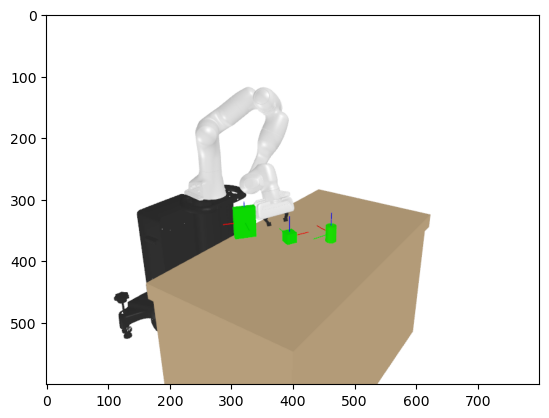

In [32]:
import matplotlib.pyplot as plt 
ax_trimesh = plt.gca()
# fig_trimesh = plt.figure()

mcts.rearr_action.scene_mngr.render_objects(None, next_node['state'])
for i in next_node['state'].objs:
    mcts.rearr_action.scene_mngr.render.render_obj_axis(None, next_node['state'].objs[i].h_mat)
mcts.rearr_action.scene_mngr.render.render_robot(robot=mcts.rearr_action.scene_mngr.scene.robot, geom=mcts.rearr_action.scene_mngr.geom)
mcts.rearr_action.scene_mngr.render.trimesh_scene.set_camera(
    angles=(1.2, 0, 0.6), distance=2, center=(0.5, 0, 1)
)
img = mcts.rearr_action.scene_mngr.render.get_scene_img(True)
# print(i ,"render")
plt.imshow(img)

In [ ]:

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
    video_name="pick_rearrangement1_level2_test_7_12",
)


In [ ]:
# mcts._level_wise_between_1_and_2_optimize(max_value_nodes)

In [ ]:
# import random
# from copy import deepcopy
# from pykin.utils.kin_utils import ShellColors as sc

# def get_grasp_action_using_contact_graspnet(success_level_1_sub_nodes):
#     node_length = int(len(success_level_1_sub_nodes)/2)
#     for i in range(node_length):
#         current_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 1]]
#         next_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 2]]
#         obj_to_manipulate =current_node['action']['rearr_obj_name']
        
#         print(f"{sc.COLOR_BROWN}{obj_to_manipulate}{sc.ENDC}")
#         for _ in range(2):
#             grasps = mcts.grasp_generator.get_grasp(
#                 init_scene = rearrangement1.init_scene,
#                 next_node = next_node,
#                 current_node = current_node,
#                 )
#             if len(grasps)>=1:
#                 grasp_poses_not_collision = mcts.grasp_generator.get_all_grasps(grasps)
#                 current_node[mcts.rearr_action.info.GRASP_POSES] = grasp_poses_not_collision
#                 break
#         g_ = random.sample(grasp_poses_not_collision,1)
#         next_node['action'].update(deepcopy(g_[0]))
        

In [ ]:
# get_grasp_action_using_contact_graspnet(max_value_nodes)

In [ ]:
# node_length = int(len(max_value_nodes)/2)
# node_length

# for i in range(node_length):
#     success_level_1_sub_nodes = max_value_nodes

#     current_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 1]]
#     next_node = mcts.tree.nodes[success_level_1_sub_nodes[2*i + 2]]
#     obj_to_manipulate =current_node['action']['rearr_obj_name']
    
#     print(obj_to_manipulate)
#     for _ in range(2):
#         grasps = mcts.grasp_generator.get_grasp(
#             init_scene = rearrangement1.init_scene,
#             next_node = next_node,
#             current_node = current_node,
#             )
#         if len(grasps)>=1:
#             grasp_poses_not_collision = mcts.grasp_generator.get_all_grasps(grasps)
#             current_node[mcts.rearr_action.info.GRASP_POSES] = grasp_poses_not_collision
#             break
            
#     g_ = random.sample(grasp_poses_not_collision,1)
#     next_node['action'].update(deepcopy(g_[0]))

In [ ]:
i = 2
current_node = mcts.tree.nodes[max_value_nodes[2*i + 1]]
next_node = mcts.tree.nodes[max_value_nodes[2*i + 2]]

In [ ]:
current_node['state'].rearr_obj_name, next_node['state'].rearr_obj_name

('cereal0', 'can0')

In [ ]:
next_node

{'number': 57,
 'visit': 1,
 'depth': 3,
 'state': <pytamp.scene.scene.Scene at 0x7f8010477e20>,
 'action': {'table': array([[-0.88392556,  0.46762763,  0.        ,  0.60391191],
         [-0.46762763, -0.88392556,  0.        ,  0.0657071 ],
         [ 0.        ,  0.        ,  1.        ,  0.85059666],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'grasp': array([[ 0.96918273,  0.07168227,  0.23568323,  0.64689929],
         [ 0.09335213, -0.99224257, -0.08209776,  0.07281226],
         [ 0.22797   ,  0.10156926, -0.96835609,  0.97117108],
         [ 0.        ,  0.        ,  0.        ,  1.        ]]),
  'pre_grasp': array([[ 0.9691827 ,  0.07168227,  0.23568323,  0.63511515],
         [ 0.09335213, -0.9922426 , -0.08209776,  0.07691715],
         [ 0.22796999,  0.10156926, -0.9683561 ,  1.0195888 ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]],
        dtype=float32),
  'post_grasp': array([[ 0.9691827 ,  0.07168227,  0.23568323,  0.6468993 ],


In [ ]:
current_node

{'depth': 3,
 'state': <pytamp.scene.scene.Scene at 0x7f8010644c70>,
 'action': {'type': 'rearr',
  'rearr_obj_name': 'can0',
  'place_obj_name': 'table',
  'rearr_poses': [{'table': array([[-0.88392556,  0.46762763,  0.        ,  0.60391191],
           [-0.46762763, -0.88392556,  0.        ,  0.0657071 ],
           [ 0.        ,  0.        ,  1.        ,  0.85059666],
           [ 0.        ,  0.        ,  0.        ,  1.        ]])}]},
 'value': 5,
 'value_history': [5],
 'visit': 1,
 'number': 56,
 'type': 'action',
 'joints': [],
 'level1': True,
 'level2': True,
 'level1_5': True,
 'success': True,
 'cost': 0,
 'test': (),
 'grasp_poses': [{'grasp': array([[-0.90091562, -0.25004029, -0.35472652,  0.69448015],
          [-0.29720896,  0.95107108,  0.08444288,  0.04882937],
          [ 0.31625603,  0.18150375, -0.93114902,  0.97750378],
          [ 0.        ,  0.        ,  0.        ,  1.        ]]),
   'pre_grasp': array([[-0.9009156 , -0.2500403 , -0.35472652,  0.7122165 ],
   

grasp
pre_grasp
post_grasp
release
pre_release
post_release


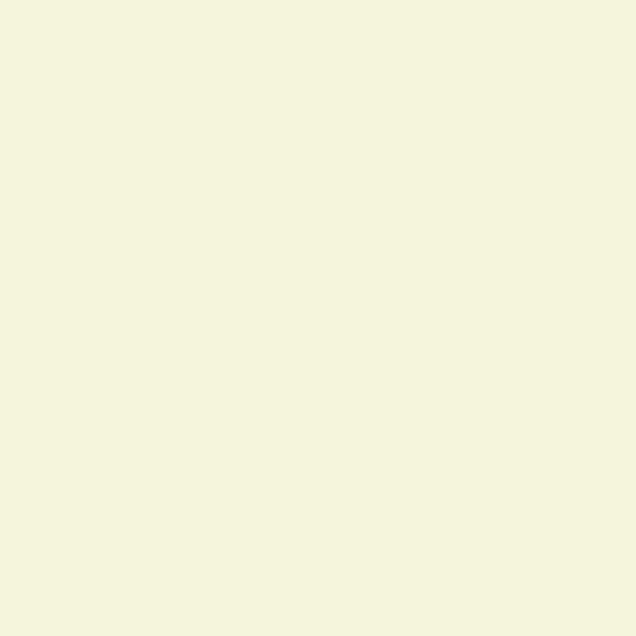

In [ ]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")


for i,o in current_node['state'].objs.items():
    mcts.rearr_action.scene_mngr.set_object_pose(i,o.h_mat)
    
for action in next_node['action']:
    if 'grasp' in action or 'release' in action:
    
        print(action)
        mcts.rearr_action.scene_mngr.set_gripper_pose(next_node['action'][action])
        mcts.rearr_action.scene_mngr.render_gripper(ax)

#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['pre_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['post_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

grasp
pre_grasp
post_grasp
release
pre_release
post_release


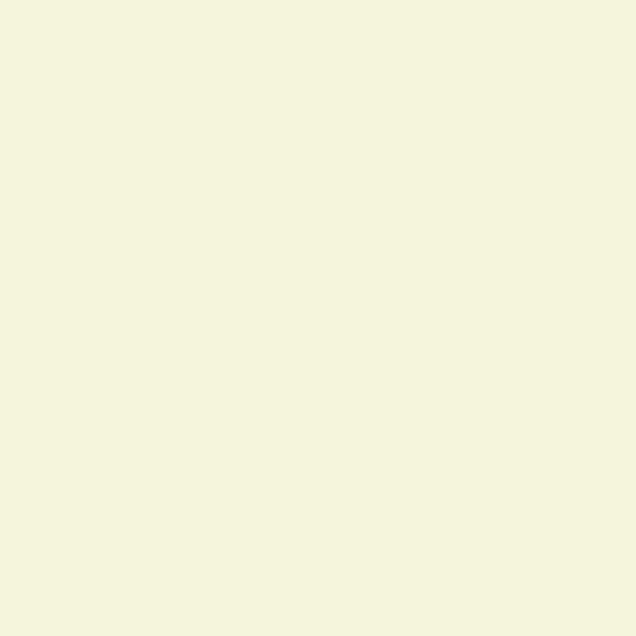

In [ ]:
fig, ax = p_utils.init_3d_figure(name="Level wise 1")


for i,o in next_node['state'].objs.items():
    mcts.rearr_action.scene_mngr.set_object_pose(i,o.h_mat)
    
for action in next_node['action']:
    if 'grasp' in action or 'release' in action:
    
        print(action)
        mcts.rearr_action.scene_mngr.set_gripper_pose(next_node['action'][action])
        mcts.rearr_action.scene_mngr.render_gripper(ax)

#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['pre_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, grasps['post_grasp'])
#     mcts.rearr_action.scene_mngr.render_axis(ax, mcts.rearr_action.scene_mngr.scene.robot.gripper.get_gripper_tcp_pose())
    
mcts.rearr_action.scene_mngr.render_objects(ax)
p_utils.plot_basis(ax)
mcts.rearr_action.show()

In [34]:
mcts.rearr_action.scene_mngr.render.render_objects(mcts.rearr_action.scene_mngr.scene.objs)

mcts.rearr_action.simulate_path(
    final_pnp_all_joint_paths[0],
    final_pick_all_objects[0],
    final_place_all_object_poses[0],
    is_save=True,
    video_name="pick_rearrangement1_level2_test_7_12",
)

IndexError: list index out of range

In [ ]:
next_node['state'].objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.39377654 -0.05920111  0.83529998]),
 'can0': Object(name=can0, pos=[0.58836741 0.27068778 0.85059666]),
 'cereal0': Object(name=cereal0, pos=[0.40992969 0.07529909 0.88526188])}